In [2]:
import sys
sys.path.append('/home/gvolta/XENONnT/gain_spe')
from PMTanalysis import *
PMT = PMTanalyzer('/home/gvolta/XENONnT/gain_spe')





___   ___  _______ .__   __.   ______   .__   __.        .___________.   __  __             _____    _____    ____  
\  \ /  / |   ____||  \ |  |  /  __  \  |  \ |  |        |           |  |  \/  |    /\     / ____|  |_   _| /  ___| 
 \  V  /  |  |__   |   \|  | |  |  |  | |   \|  |  _   _ `---|  |----`  | \  / |   /  \    | |  __    | |   | |      
  >   <   |   __|  |  . `  | |  |  |  | |  . `  | | \ | |    |  |       | |\/| |  / /\ \   | | |_ |   | |   | |      
 /  .  \  |  |____ |  |\   | |  `--`  | |  |\   | |  \| |    |  |       | |  | | / ____ \  | |__| |  _| |_  | |___  
/__/ \__\ |_______||__| \__|  \______/  |__| \__| |_|\__|    |__|       |_|  |_|/_/    \_\ \ _____| |_____| \_____|  
powered by Giovanni Volta and Chiara Capelli (c)




Configuration file:  /home/gvolta/XENONnT/gain_spe/configuration.ini


In [6]:
!ls /dali/lgrandi/giovo/XENONnT/spe_acceptance/Data/20200415

SPE_topbulk.npz  SPE_topring.npz


In [24]:
spe_folder = '/dali/lgrandi/giovo/XENONnT/spe_acceptance/Data/20200415/'
np_load_old = np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)
data = np.load(spe_folder + 'SPE_topbulk.npz')
np.load = np_load_old

In [25]:
SPE_topbulk = data['arr_0']
SPE_topbulk_acceptance = data['arr_1']

#################################################
############### Bin Correction: 7 ###############
#################################################


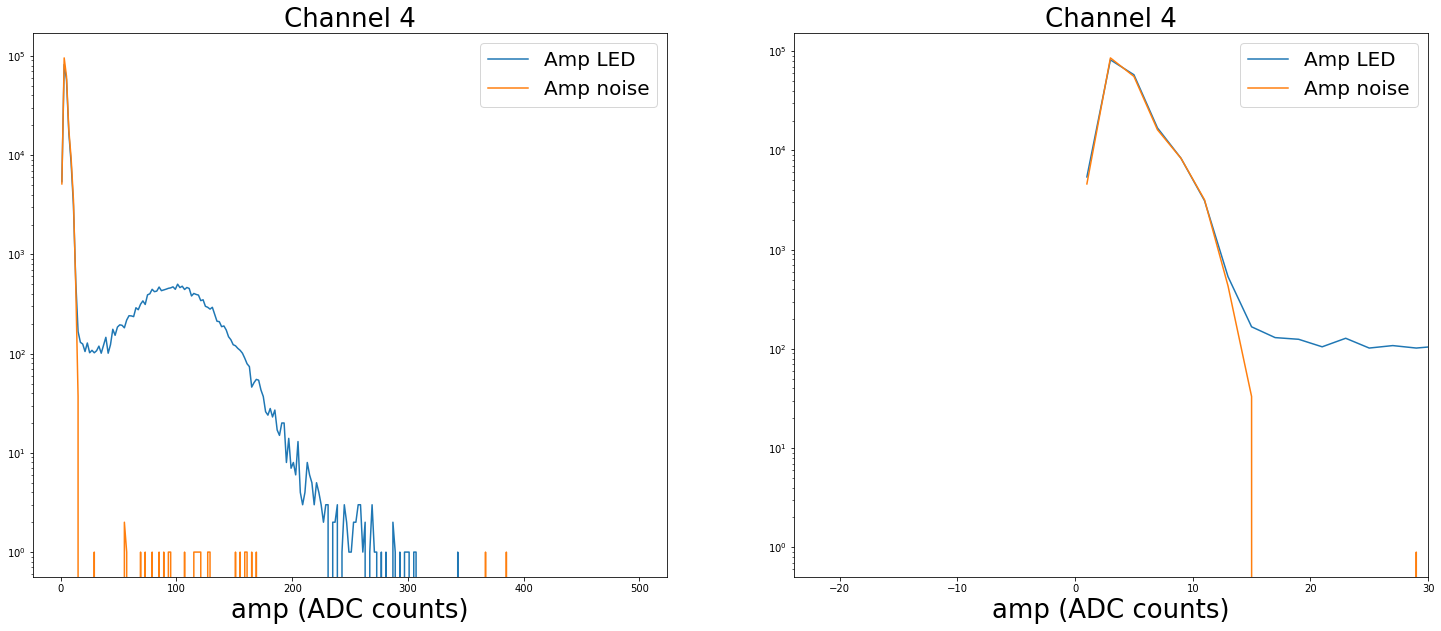

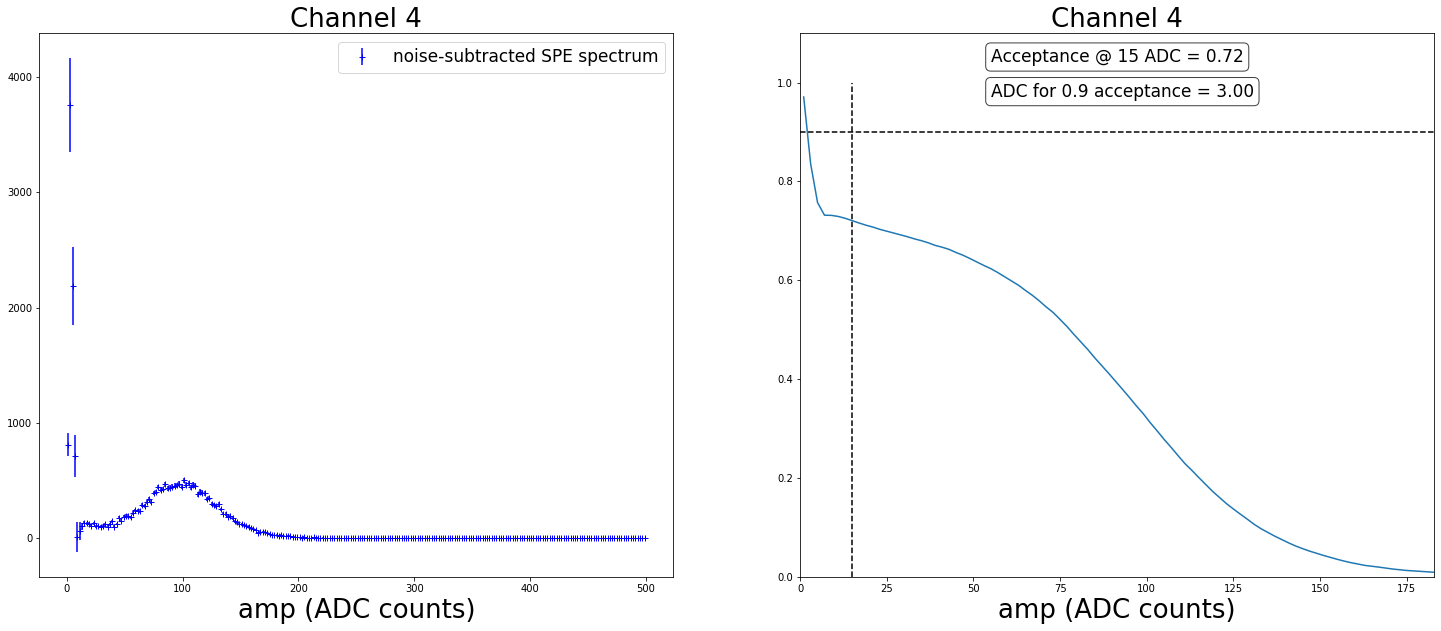

In [29]:
bin_correction = 7
print('#################################################')
print('############### Bin Correction: '+str(bin_correction)+' ###############')
print('#################################################')

fig = plt.figure(figsize=(25,10))
n_channel = 4
mask = np.where(SPE_topbulk_acceptance[SPE_topbulk_acceptance['channel']==n_channel]['SPE acceptance '+str(bin_correction)+' bin'][0]<0.01)
x_max = SPE_topbulk_acceptance[SPE_topbulk_acceptance['channel']==n_channel]['bins SPE acceptance '+str(bin_correction)+' bin'][0][mask][0]

plt.subplot(121)

x = SPE_topbulk[SPE_topbulk['channel']==n_channel]['bins led'][0]
x_led = 0.5 * (x[1:] + x[:-1])
plt.plot(x_led, 
         SPE_topbulk[SPE_topbulk['channel']==n_channel]['spectrum led'][0],
         label='Amp LED')
x = SPE_topbulk[SPE_topbulk['channel']==n_channel]['bins noise'][0]
x_noise = 0.5 * (x[1:] + x[:-1])
plt.plot(x_noise, 
         SPE_topbulk[SPE_topbulk['channel']==n_channel]['spectrum noise'][0], 
         label='Amp noise')

plt.xlabel('amp (ADC counts)', fontsize=26)
plt.title('Channel %d' %n_channel, fontsize=26)
plt.yscale('log')
plt.legend(loc='best', fontsize=20)

plt.subplot(122)

x = SPE_topbulk[SPE_topbulk['channel']==n_channel]['bins led'][0]
x_led = 0.5 * (x[1:] + x[:-1])
plt.plot(x_led, 
         SPE_topbulk[SPE_topbulk['channel']==n_channel]['spectrum led'][0],
         label='Amp LED')
x = SPE_topbulk[SPE_topbulk['channel']==n_channel]['bins noise'][0]
x_noise = 0.5 * (x[1:] + x[:-1])
plt.plot(x_noise, 
         SPE_topbulk[SPE_topbulk['channel']==n_channel]['spectrum noise scaled '+str(bin_correction)+' bin'][0], 
         label='Amp noise')

plt.xlim(right=30)
plt.yscale('log')
plt.xlabel('amp (ADC counts)', fontsize=26)
plt.title('Channel %d' %n_channel, fontsize=26)
plt.legend(loc='best', fontsize=20)


fig = plt.figure(figsize=(25,10))

plt.subplot(121)

plt.errorbar(x = SPE_topbulk_acceptance[SPE_topbulk_acceptance['channel']==n_channel]['bins SPE acceptance '+str(bin_correction)+' bin'][0], 
             y = SPE_topbulk_acceptance[SPE_topbulk_acceptance['channel']==n_channel]['noise-subtracted spectrum '+str(bin_correction)+' bin'][0], 
             yerr = SPE_topbulk_acceptance[SPE_topbulk_acceptance['channel']==n_channel]['error of noise-subtracted spectrum '+str(bin_correction)+' bin'][0], 
             fmt='b+', label='noise-subtracted SPE spectrum')

#plt.xlim(left = 0)
plt.xlabel('amp (ADC counts)', fontsize=26)
plt.title('Channel %d' %n_channel, fontsize=26)
plt.legend(loc='best', fontsize=17)

plt.subplot(122)

plt.plot(SPE_topbulk_acceptance[SPE_topbulk_acceptance['channel']==n_channel]['bins SPE acceptance '+str(bin_correction)+' bin'][0], 
         SPE_topbulk_acceptance[SPE_topbulk_acceptance['channel']==n_channel]['SPE acceptance '+str(bin_correction)+' bin'][0]) 

plt.text(55, 1.07, 
         'Acceptance @ 15 ADC = %.2f'%(SPE_topbulk_acceptance[SPE_topbulk_acceptance['channel']==n_channel]['Acceptance @ 15 ADC '+str(bin_correction)+' bin'][0]),
         horizontalalignment='left', verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.75), 
         fontsize=17)

plt.text(55, 1, 
         'ADC for 0.9 acceptance = %.2f'%(SPE_topbulk_acceptance[SPE_topbulk_acceptance['channel']==n_channel]['Threshold for 0.9 acceptance '+str(bin_correction)+' bin'][0]), 
         horizontalalignment='left', verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.75), 
         fontsize=17)

plt.hlines(y=0.9, xmin=0, xmax=x_max, colors='k', linestyles='dashed')
plt.vlines(x=15, ymin=0, ymax=1, colors='k', linestyles='dashed')
plt.title('Acceptance', fontsize=26)
plt.ylim(0,1.1)
plt.xlim(0, x_max)
plt.xlabel('amp (ADC counts)', fontsize=26)
plt.title('Channel %d' %n_channel, fontsize=26)
#plt.legend(loc='best', fontsize=15)

plt.show()